In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing important libraries
import pandas as pd
import yfinance as yf
from datetime import datetime
import seaborn as sns

In [3]:
#Data from yahoo finance 
start_date = datetime.now()-pd.DateOffset(months=12)
end_date = datetime.now()
tickers = ['INFY.NS','TCS.NS','HCLTECH.NS', 'WIPRO.NS']
df_list = []
for ticker in tickers:
    data = yf.download(ticker,start=start_date,end=end_date)
    df_list.append(data)

    df=pd.concat(df_list, keys=tickers, names=['Ticker','Date'])
    print(df.head())

[*********************100%%**********************]  1 of 1 completed
                           Open         High          Low        Close  \
Ticker  Date                                                             
INFY.NS 2022-09-05  1451.000000  1467.000000  1446.349976  1461.300049   
        2022-09-06  1461.300049  1470.000000  1445.449951  1455.099976   
        2022-09-07  1440.000000  1465.750000  1438.050049  1457.650024   
        2022-09-08  1475.000000  1481.099976  1463.599976  1475.900024   
        2022-09-09  1488.000000  1520.000000  1480.000000  1511.650024   

                      Adj Close   Volume  
Ticker  Date                              
INFY.NS 2022-09-05  1407.397583  3669352  
        2022-09-06  1401.426147  3428442  
        2022-09-07  1403.882080  3600574  
        2022-09-08  1421.458984  4061475  
        2022-09-09  1455.890381  4816910  
[*********************100%%**********************]  1 of 1 completed
                           Open         Hi

In [28]:
for ticker , group in df.groupby('Ticker'):
    print(f'description of {ticker}')
    
    print(df.describe())
   

description of HCLTECH.NS
              Open         High          Low        Close    Adj Close  \
count   992.000000   992.000000   992.000000   992.000000   992.000000   
mean   1548.707961  1560.652821  1535.387050  1548.418497  1522.045108   
std    1072.648316  1080.520548  1064.271916  1072.970585  1056.712130   
min     358.000000   360.750000   352.000000   356.200012   356.200012   
25%     774.662498   785.175018   766.875000   777.549980   748.045311   
50%    1210.375000  1216.299988  1186.450012  1209.100037  1188.474854   
75%    1982.112488  2009.374969  1970.750061  1988.337494  1931.630432   
max    3549.000000  3575.000000  3527.000000  3558.050049  3522.623535   

             Volume  
count  9.920000e+02  
mean   4.111648e+06  
std    3.742335e+06  
min    0.000000e+00  
25%    1.918285e+06  
50%    3.212040e+06  
75%    5.100518e+06  
max    5.317170e+07  
description of INFY.NS
              Open         High          Low        Close    Adj Close  \
count   992.

since date is considered as column not index converting it to index.

In [4]:

df = df.reset_index()
print(df.head())


    Ticker       Date         Open         High          Low        Close  \
0  INFY.NS 2022-09-05  1451.000000  1467.000000  1446.349976  1461.300049   
1  INFY.NS 2022-09-06  1461.300049  1470.000000  1445.449951  1455.099976   
2  INFY.NS 2022-09-07  1440.000000  1465.750000  1438.050049  1457.650024   
3  INFY.NS 2022-09-08  1475.000000  1481.099976  1463.599976  1475.900024   
4  INFY.NS 2022-09-09  1488.000000  1520.000000  1480.000000  1511.650024   

     Adj Close   Volume  
0  1407.397583  3669352  
1  1401.426147  3428442  
2  1403.882080  3600574  
3  1421.458984  4061475  
4  1455.890381  4816910  


In [6]:
Checcking the performances of 4 stocks
import plotly.express as px
fig = px.line(df, x='Date',y='Close',color='Ticker',title="Stock Market Performance for the Last twelve months")
fig.show()

In [20]:
#volume purchased 
for ticker , group in df.groupby('Ticker'):
    fig0 = px.line(group, x='Date',y='Volume',title=f"{ticker} Volume")
    fig0.show()

In [10]:
fig = px.area(df , x='Date',y='Close',color='Ticker',facet_col='Ticker',labels={'Date':'Date','Close':'Closinf Price','Ticker':'Company'},title='Stock Prices for Infosys,Tcs,HCL,Wipro')
fig.show()

In [11]:
df['MA10']=df.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0,drop=True)
df['MA20']=df.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0,drop=True)
for ticker , group in df.groupby('Ticker'):
    print(f'Movinf averrages for {ticker}')
    print(group[['MA10','MA20']])

Movinf averrages for HCLTECH.NS
            MA10         MA20
496          NaN          NaN
497          NaN          NaN
498          NaN          NaN
499          NaN          NaN
500          NaN          NaN
..           ...          ...
739  1171.144983  1155.472491
740  1169.799988  1157.514996
741  1169.134985  1159.114996
742  1168.679993  1161.177496
743  1169.890002  1164.192499

[248 rows x 2 columns]
Movinf averrages for INFY.NS
            MA10         MA20
0            NaN          NaN
1            NaN          NaN
2            NaN          NaN
3            NaN          NaN
4            NaN          NaN
..           ...          ...
243  1408.885010  1392.389996
244  1411.295007  1395.487500
245  1412.960010  1398.985004
246  1415.350000  1402.915002
247  1420.854993  1406.892499

[248 rows x 2 columns]
Movinf averrages for TCS.NS
            MA10         MA20
248          NaN          NaN
249          NaN          NaN
250          NaN          NaN
251          NaN       

In [12]:
for ticker , group in df.groupby('Ticker'):
    fig2 = px.line(group, x='Date',y=['Close','MA10','MA20'],title=f"{ticker} Moving Averages")
    fig2.show()

In [13]:
df['Volatility']=df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0,drop=True)
fig3=px.line(df,x='Date',y='Volatility',color='Ticker',title ='Volatality')
fig3.show()

In [14]:
Infosys = df.loc[df['Ticker'] == 'INFY.NS',['Date','Close']].rename(columns={'Close':'INFY.NS'})
TCS = df.loc[df['Ticker'] == 'TCS.NS',['Date','Close']].rename(columns={'Close':'TCS.NS'})
HCL = df.loc[df['Ticker'] == 'HCLTECH.NS',['Date','Close']].rename(columns={'Close':'HCLTECH.NS'})
WIPRO = df.loc[df['Ticker'] == 'WIPRO.NS',['Date','Close']].rename(columns={'Close':'WIPRO.NS'})

In [15]:
df_corr =pd.merge(pd.merge(Infosys,TCS, on='Date'),pd.merge(HCL,WIPRO, on = 'Date'),on='Date')


In [16]:
print(df_corr.head(5))


        Date      INFY.NS       TCS.NS  HCLTECH.NS    WIPRO.NS
0 2022-09-05  1461.300049  3133.399902  936.000000  405.500000
1 2022-09-06  1455.099976  3127.050049  937.799988  404.450012
2 2022-09-07  1457.650024  3149.600098  931.700012  407.450012
3 2022-09-08  1475.900024  3169.649902  931.049988  412.799988
4 2022-09-09  1511.650024  3217.649902  948.500000  417.149994


In [17]:
 correlation = df_corr.corr(method='pearson')

C:\Users\neela\AppData\Local\Temp\ipykernel_20868\1039638734.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

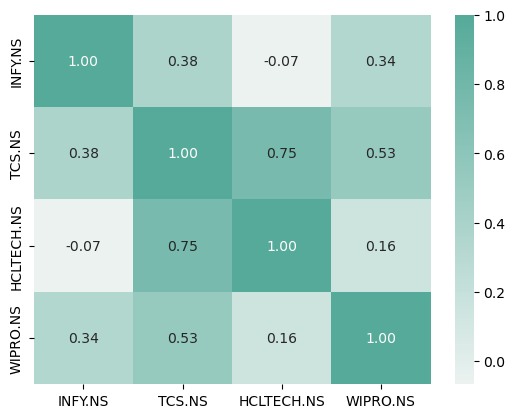

In [33]:
sns.heatmap(correlation,cmap=sns.color_palette("light:#5A9", as_cmap=True),annot=True,fmt=".002f")